# analysis on Amazon sales

In [1]:
# including basic libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


In [3]:
pwd= os.getcwd()

In [4]:
raw_data=pd.read_excel(pwd+"\\Amazon Sales data.xlsx")
raw_data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05 00:00:00,341417157,2014-08-05 00:00:00,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,2014-05-07 00:00:00,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02 00:00:00,115456712,2013-06-02 00:00:00,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,2011-03-09 00:00:00,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11 00:00:00,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-01-06 00:00:00,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,2015-08-08 00:00:00,5767,81.73,56.67,471336.91,326815.89,144521.02


In [5]:
dataset=raw_data.copy()
dataset.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05 00:00:00,341417157,2014-08-05 00:00:00,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,2014-05-07 00:00:00,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02 00:00:00,115456712,2013-06-02 00:00:00,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
dataset.shape

(100, 14)

#  
## Data cleaning and transformation

###  checking and converting(if required) the datatypes of the columns


In [7]:
dataset.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [8]:
dataset["Order Date"]=pd.to_datetime(dataset["Order Date"])
dataset["Ship Date"]=pd.to_datetime(dataset["Ship Date"])
dataset["Order ID"]=dataset["Order ID"].astype(str)
dataset.dtypes


Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                  object
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

###    

### checking if any coulumns contains any garbage value


In [9]:
for i in dataset.columns:
    
    print("\nno.of unique values present in column %s are %i\n"%(i,dataset[i].nunique()))
    print(dataset[i].unique())
    


no.of unique values present in column Region are 7

['Australia and Oceania' 'Central America and the Caribbean' 'Europe'
 'Sub-Saharan Africa' 'Asia' 'Middle East and North Africa'
 'North America']

no.of unique values present in column Country are 76

['Tuvalu' 'Grenada' 'Russia' 'Sao Tome and Principe' 'Rwanda'
 'Solomon Islands' 'Angola' 'Burkina Faso' 'Republic of the Congo'
 'Senegal' 'Kyrgyzstan' 'Cape Verde' 'Bangladesh' 'Honduras' 'Mongolia'
 'Bulgaria' 'Sri Lanka' 'Cameroon' 'Turkmenistan' 'East Timor' 'Norway'
 'Portugal' 'New Zealand' 'Moldova ' 'France' 'Kiribati' 'Mali'
 'The Gambia' 'Switzerland' 'South Sudan' 'Australia' 'Myanmar' 'Djibouti'
 'Costa Rica' 'Syria' 'Brunei' 'Niger' 'Azerbaijan' 'Slovakia' 'Comoros'
 'Iceland' 'Macedonia' 'Mauritania' 'Albania' 'Lesotho' 'Saudi Arabia'
 'Sierra Leone' "Cote d'Ivoire" 'Fiji' 'Austria' 'United Kingdom'
 'San Marino' 'Libya' 'Haiti' 'Gabon' 'Belize' 'Lithuania' 'Madagascar'
 'Democratic Republic of the Congo' 'Pakistan' 'Me

#  
### checking for null values

In [10]:
round(dataset.isna().mean()*100,2) 

Region            0.0
Country           0.0
Item Type         0.0
Sales Channel     0.0
Order Priority    0.0
Order Date        0.0
Order ID          0.0
Ship Date         0.0
Units Sold        0.0
Unit Price        0.0
Unit Cost         0.0
Total Revenue     0.0
Total Cost        0.0
Total Profit      0.0
dtype: float64

##  
### checking and treating the outliners if present

In [11]:
df_num = dataset.select_dtypes(include="number")
df_num.head()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,2804,205.70,117.11,576782.80,328376.44,248406.36
2,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,8102,9.33,6.92,75591.66,56065.84,19525.82
4,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [12]:
df_col = dataset.drop(df_num.columns,axis=1)
df_col.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-05-07
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02


In [13]:
df_num.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


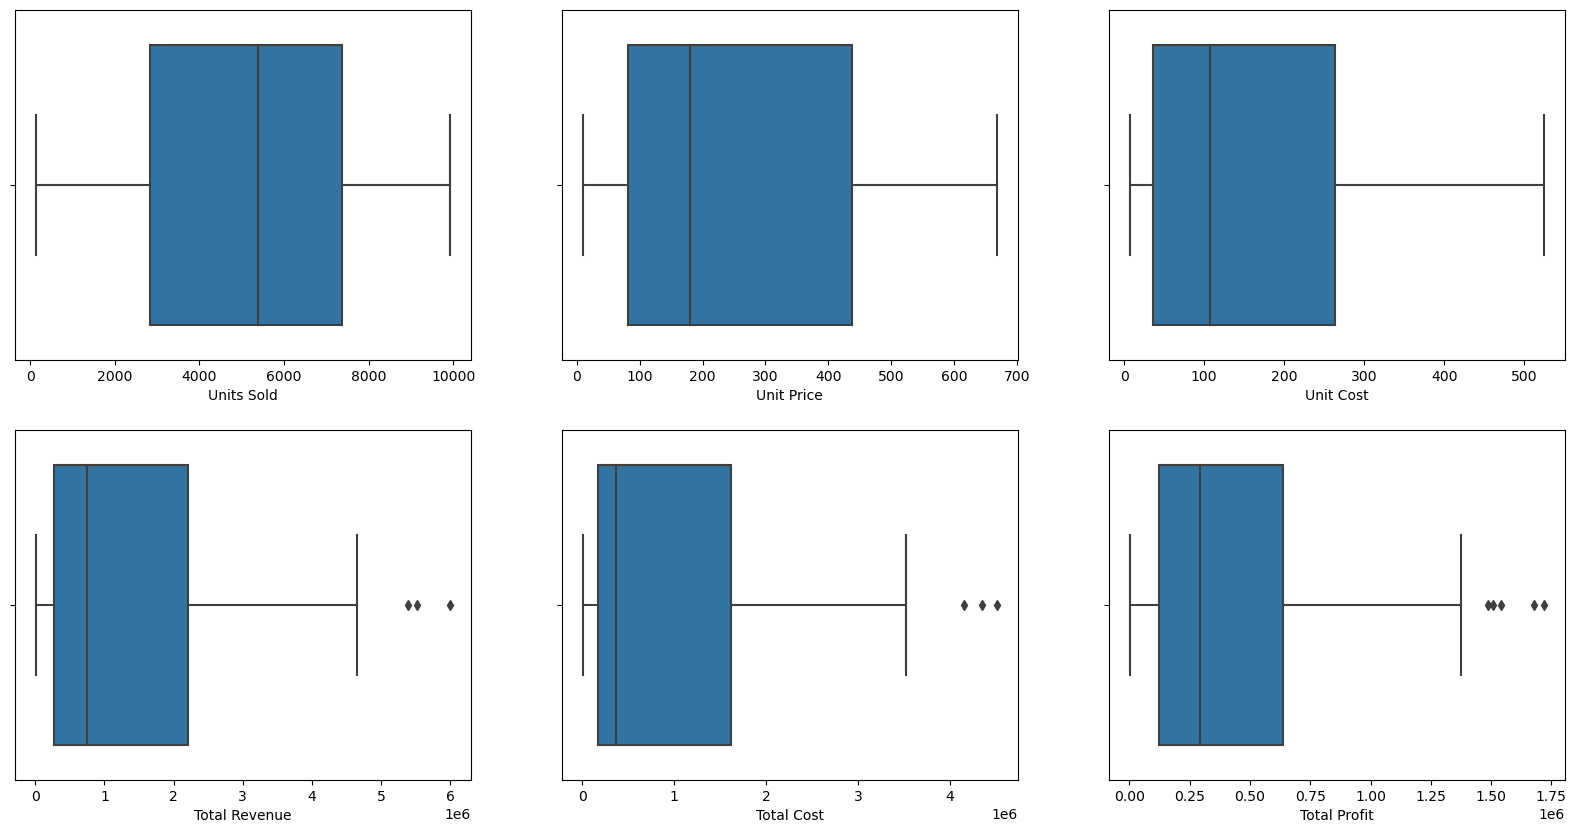

In [14]:

t=1
plt.figure(figsize=[20,10])
for i in df_num.columns:
    plt.subplot(2,3,t)
    sns.boxplot(dataset[i])
   
    t=t+1
plt.show()

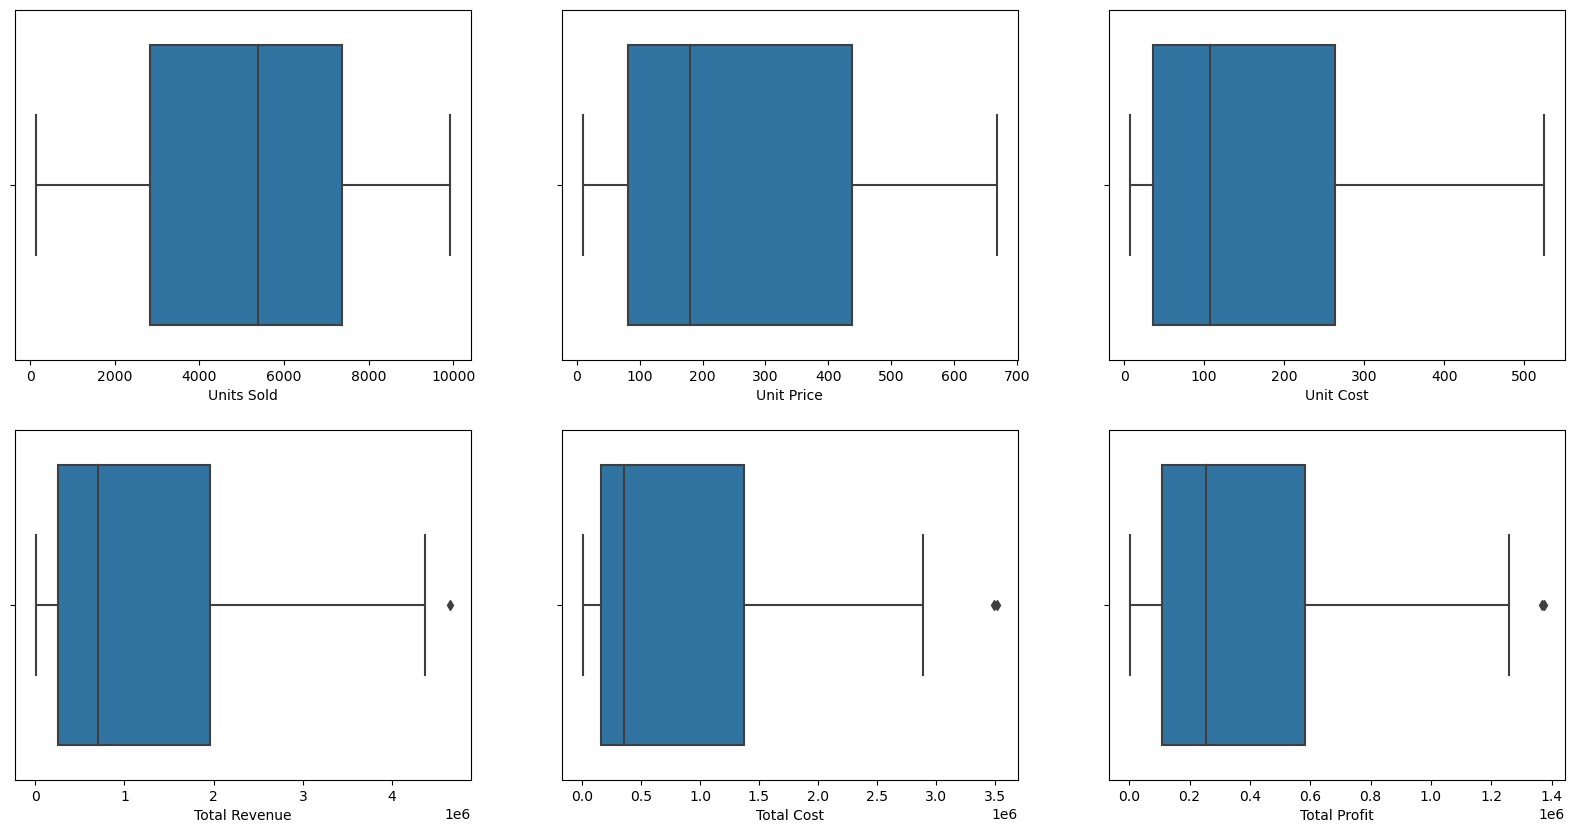

In [15]:
# deleting the outliners and replacing them by null values ( by default)


for i in df_num.columns:
    
    q1=df_num[i].quantile(0.25)
    q3=df_num[i].quantile(0.75)
    iqr=q3-q1
    dataset[i]=dataset[i][((dataset[i]>q1-iqr*1.5)&(dataset[i]<q3+iqr*1.5))]



t=1
plt.figure(figsize=[20,10])
for i in df_num.columns:
    plt.subplot(2,3,t)
    sns.boxplot(x=dataset[i])
   
    t=t+1
plt.show()

In [16]:
dataset.dropna(inplace= True) # now droping the null values

In [17]:
dataset.shape

(93, 14)

#  
###  calculating delivery lead time from order date and ship date

In [18]:
dataset["delivery lead time"]=abs(dataset["Order Date"]-dataset["Ship Date"])

In [19]:
dataset.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,delivery lead time
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75,181 days
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82,44 days
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50,151 days


##  
### extracting the year amd month of the sales from ordered date

In [20]:
dataset["sales_year"]= pd.DatetimeIndex(dataset["Order Date"]).year
dataset["sales_month"]= pd.DatetimeIndex(dataset["Order Date"]).month
dataset["sales_month_year"]= dataset["Order Date"].dt.to_period("M")
dataset.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,delivery lead time,sales_year,sales_month,sales_month_year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75,181 days,2014,2,2014-02
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82,44 days,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50,151 days,2013,1,2013-01


In [21]:
dataset["Sales Channel"]=dataset["Sales Channel"].replace({"Offline" : 1 ,"Online":0})

dataset.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,delivery lead time,sales_year,sales_month,sales_month_year
0,Australia and Oceania,Tuvalu,Baby Food,1,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,0,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days,2012,8,2012-08
2,Europe,Russia,Office Supplies,1,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75,181 days,2014,2,2014-02
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,0,C,2014-06-20,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82,44 days,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,1,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50,151 days,2013,1,2013-01


#  
### checking the distribution plots for the numerical values ( in this case the cost, price ,revenew and profit etc.)

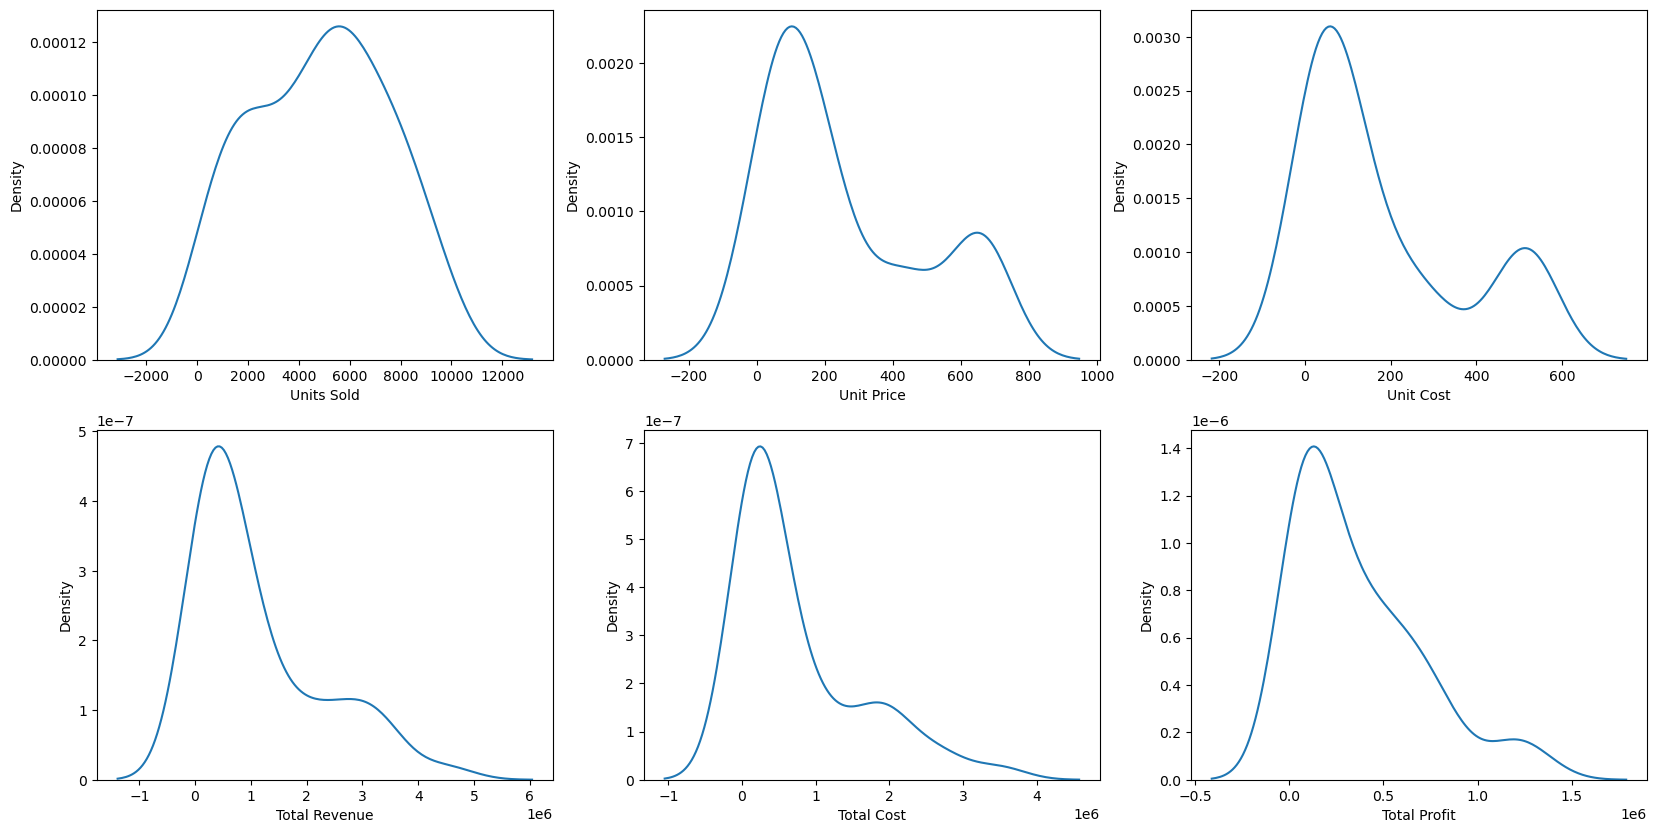

In [22]:


t=1
plt.figure(figsize=[20,10])
for i in df_num.columns:
    plt.subplot(2,3,t)
    sns.kdeplot(x=dataset[i])
   
    t=t+1
plt.show()

##  
### saving the clean data for further use


In [23]:
# dataset.to_excel(pwd+"\\amazon_sale_clean_data.xlsx",index= False)